In [29]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
%matplotlib inline

In [31]:
pwd = os.getcwd()
# file_path = os.path.join(pwd, os.pardir, 'data/clean_data.csv')
file_path = os.path.join(pwd, os.pardir, 'data/sample_data.csv')

In [32]:
data = pd.read_csv(file_path, parse_dates=["Start", "End"])

In [33]:
data_modified = data.copy()

In [35]:
user_agg = data_modified.groupby(["MSISDN/Number"], as_index=False).agg({'Bearer Id':'count', "Dur. (s)": "sum", "Total UL (Bytes)": "sum", "Total DL (Bytes)": "sum",  "Social Media UL (Bytes)": "sum", "Social Media DL (Bytes)": "sum", "Google UL (Bytes)": "sum", "Google DL (Bytes)": "sum", "Email UL (Bytes)": "sum", "Email DL (Bytes)": "sum", "Youtube UL (Bytes)": "sum", "Youtube DL (Bytes)": "sum", "Netflix UL (Bytes)": "sum", "Netflix DL (Bytes)": "sum", "Gaming UL (Bytes)": "sum", "Gaming DL (Bytes)": "sum", "Other UL (Bytes)": "sum", "Other DL (Bytes)": "sum"})
user_agg.reset_index(drop=True, inplace=True)

In [36]:
user_agg["MSISDN/Number"] = user_agg["MSISDN/Number"].astype(str)

In [37]:
user_agg.head()

,MSISDN/Number,Bearer Id,Dur. (s),Total UL (Bytes),Total DL (Bytes),Social Media UL (Bytes),Social Media DL (Bytes),Google UL (Bytes),Google DL (Bytes),Email UL (Bytes),Email DL (Bytes),Youtube UL (Bytes),Youtube DL (Bytes),Netflix UL (Bytes),Netflix DL (Bytes),Gaming UL (Bytes),Gaming DL (Bytes),Other UL (Bytes),Other DL (Bytes)
0,33603291937,1,850766,39654040,809144948,15581,1699911,3285779,10110182,138779,3285424,10610680,15567567,10621276,12189103,3655164,766292761,11326781,34550147
1,33659219748,3,2454876,103139813,1726181013,140654,4129524,7348813,22980782,1574152,6002682,31233733,55157958,21893818,44894899,15490502,1593015168,25458141,340572989
2,33664473872,1,889834,33691738,535118044,10046,829305,1580541,7241855,807271,1541381,16817598,2805710,2029991,18094847,1063672,504604946,11382619,526987098
3,33664962239,1,1823652,36749741,308879636,24420,1545765,1271433,1634479,137762,3563542,2501332,15854611,9656251,8198936,14344150,278082303,8814393,171744450
4,33665368271,1,1035261,47925246,70562047,1482,1623509,3068975,1837897,252032,1838947,1886295,7234465,17981760,13231006,14084934,44796223,10649768,803653557


In [38]:
user_agg.rename(columns={"Bearer Id": "Session Count"}, inplace=True)

In [39]:
user_agg["Total Data Transferred"] = user_agg["Total UL (Bytes)"] + user_agg["Total DL (Bytes)"]

In [40]:
user_agg["Google Volume (Bytes)"] = user_agg["Google UL (Bytes)"] + user_agg["Google DL (Bytes)"]
user_agg["Netflix Volume (Bytes)"] = user_agg["Netflix UL (Bytes)"] + user_agg["Netflix DL (Bytes)"]
user_agg["Youtube Volume (Bytes)"] = user_agg["Youtube UL (Bytes)"] + user_agg["Youtube DL (Bytes)"]
user_agg["Gaming Volume (Bytes)"] = user_agg["Gaming UL (Bytes)"] + user_agg["Gaming DL (Bytes)"]
user_agg["Email Volume (Bytes)"] = user_agg["Email UL (Bytes)"] + user_agg["Email DL (Bytes)"]
user_agg["Social Media Volume (Bytes)"] = user_agg["Social Media UL (Bytes)"] + user_agg["Social Media DL (Bytes)"]
user_agg["Other Volume (Bytes)"] = user_agg["Other UL (Bytes)"] + user_agg["Other DL (Bytes)"]

In [41]:
volume_per_user = user_agg.drop(columns=[
    "Total UL (Bytes)",
    "Total DL (Bytes)",
    "Social Media UL (Bytes)",
    "Social Media DL (Bytes)",
    "Google UL (Bytes)",
    "Google DL (Bytes)",
    "Email UL (Bytes)",
    "Email DL (Bytes)",
    "Youtube UL (Bytes)",
    "Youtube DL (Bytes)",
    "Netflix UL (Bytes)",
    "Netflix DL (Bytes)",
    "Gaming UL (Bytes)",
    "Gaming DL (Bytes)",
    "Other UL (Bytes)",
    "Other DL (Bytes)"
])

In [42]:
# to convert the scientific notation to decimal format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [43]:
volume_per_user.head()

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
0,33603291937,1,850766,848798988,13395961,22810379,26178247,769947925,3424203,1715492,45876928
1,33659219748,3,2454876,1829320826,30329595,66788717,86391691,1608505670,7576834,4270178,366031130
2,33664473872,1,889834,568809782,8822396,20124838,19623308,505668618,2348652,839351,538369717
3,33664962239,1,1823652,345629377,2905912,17855187,18355943,292426453,3701304,1570185,180558843
4,33665368271,1,1035261,118487293,4906872,31212766,9120760,58881157,2090979,1624991,814303325


In [44]:
plt.style.use('seaborn')

### Top 10 Customer Engagement By Session
---

In [45]:
top_10_customers_per_session_engagement = volume_per_user.sort_values(by=["Session Count"], ascending=False)[:10]
top_10_customers_per_session_engagement

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
1,33659219748,3,2454876,1829320826,30329595,66788717,86391691,1608505670,7576834,4270178,366031130
0,33603291937,1,850766,848798988,13395961,22810379,26178247,769947925,3424203,1715492,45876928
9,33681854413,1,1365104,707185356,4414096,35565545,39359124,609920783,937385,1933278,541959383
15,33760627129,1,1361762,307690973,10229119,23751202,34425237,229980251,3363124,1726277,414908351
14,33753758738,1,780471,101047021,6491896,5557753,26558004,42366688,2653810,2066962,152500509
13,33750343200,1,1321509,889352748,11811761,15092588,36534765,810387875,2070983,657493,761837216
12,33699795932,1,1089009,607681403,7748843,17539799,34222253,531237049,2110349,912788,564619822
11,33698759051,1,778387,410517220,6134557,30899577,21482026,330372600,3295932,3345436,56842974
10,33698743617,1,941634,903975407,8902099,19054441,29297508,828219634,3380069,372625,187669517
8,33669013307,1,767722,199593503,3793544,19965376,36068912,124373236,1055306,1252821,371687999


In [46]:
top_10_customers_per_session_engagement[["MSISDN/Number", "Session Count", "Dur. (s)", "Total Data Transferred"]]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred
1,33659219748,3,2454876,1829320826
0,33603291937,1,850766,848798988
9,33681854413,1,1365104,707185356
15,33760627129,1,1361762,307690973
14,33753758738,1,780471,101047021
13,33750343200,1,1321509,889352748
12,33699795932,1,1089009,607681403
11,33698759051,1,778387,410517220
10,33698743617,1,941634,903975407
8,33669013307,1,767722,199593503


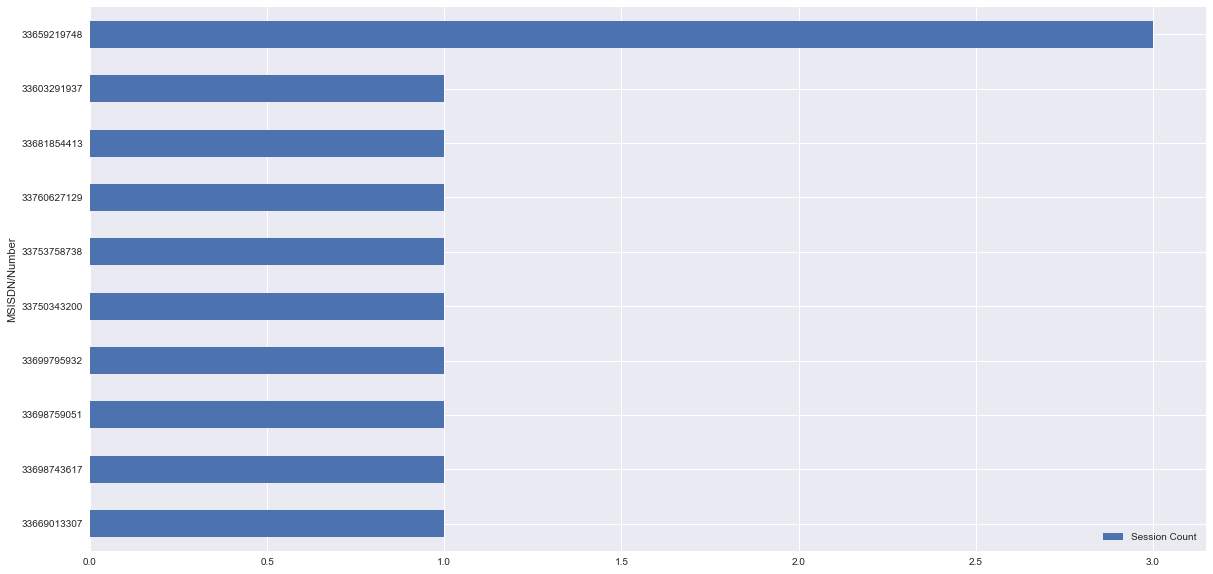

In [47]:
top_10_customers_per_session_engagement.plot(kind="barh", x="MSISDN/Number", y="Session Count", figsize=(20, 10)).invert_yaxis()

### Top 10 Customer Engagement By Duration
---

In [48]:
top_10_customers_per_duration_engagement = volume_per_user.sort_values(by=["Dur. (s)"], ascending=False)[:10]
top_10_customers_per_duration_engagement

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
1,33659219748,3,2454876,1829320826,30329595,66788717,86391691,1608505670,7576834,4270178,366031130
3,33664962239,1,1823652,345629377,2905912,17855187,18355943,292426453,3701304,1570185,180558843
9,33681854413,1,1365104,707185356,4414096,35565545,39359124,609920783,937385,1933278,541959383
15,33760627129,1,1361762,307690973,10229119,23751202,34425237,229980251,3363124,1726277,414908351
13,33750343200,1,1321509,889352748,11811761,15092588,36534765,810387875,2070983,657493,761837216
12,33699795932,1,1089009,607681403,7748843,17539799,34222253,531237049,2110349,912788,564619822
6,33668185951,1,1074638,784759966,12934133,13881809,23944031,723461512,2902410,3200014,659414334
4,33665368271,1,1035261,118487293,4906872,31212766,9120760,58881157,2090979,1624991,814303325
16,33763490140,1,951292,834163359,3872713,18933702,31924969,765055811,3500104,3161403,545316477
10,33698743617,1,941634,903975407,8902099,19054441,29297508,828219634,3380069,372625,187669517


In [49]:
top_10_customers_per_duration_engagement[["MSISDN/Number", "Session Count", "Dur. (s)", "Total Data Transferred"]]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred
1,33659219748,3,2454876,1829320826
3,33664962239,1,1823652,345629377
9,33681854413,1,1365104,707185356
15,33760627129,1,1361762,307690973
13,33750343200,1,1321509,889352748
12,33699795932,1,1089009,607681403
6,33668185951,1,1074638,784759966
4,33665368271,1,1035261,118487293
16,33763490140,1,951292,834163359
10,33698743617,1,941634,903975407


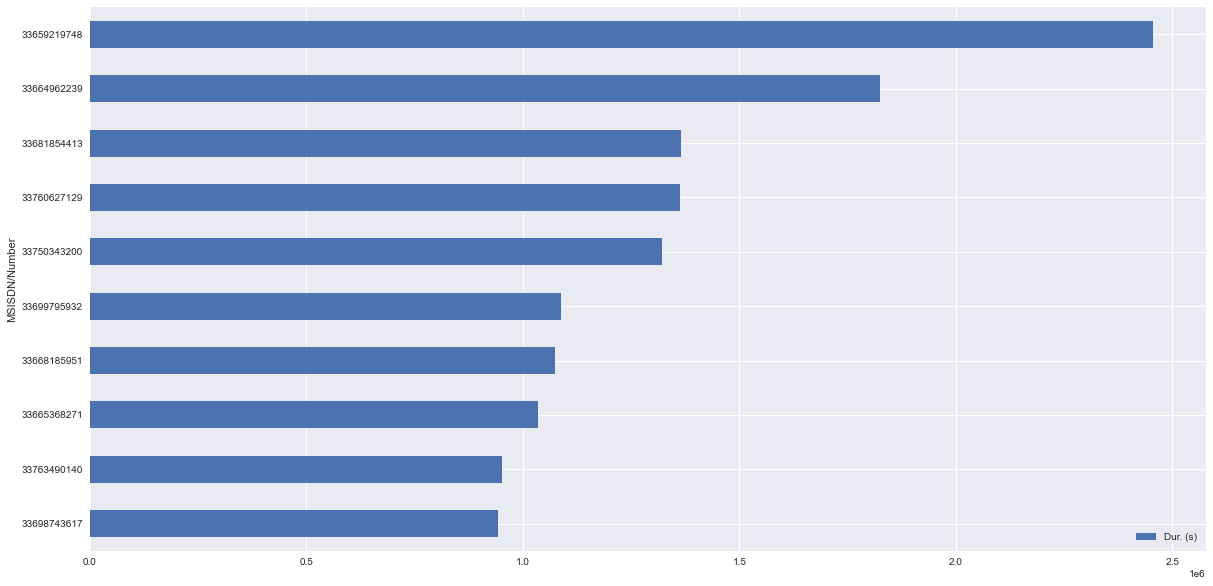

In [50]:
top_10_customers_per_duration_engagement.plot(kind="barh", x="MSISDN/Number", y="Dur. (s)", figsize=(20, 10)).invert_yaxis()

### Top 10 Customer Engagement By Total Data Transferred
---

In [51]:
top_10_customers_per_data_engagement = volume_per_user.sort_values(by=["Total Data Transferred"], ascending=False)[:10]
top_10_customers_per_data_engagement

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
1,33659219748,3,2454876,1829320826,30329595,66788717,86391691,1608505670,7576834,4270178,366031130
10,33698743617,1,941634,903975407,8902099,19054441,29297508,828219634,3380069,372625,187669517
13,33750343200,1,1321509,889352748,11811761,15092588,36534765,810387875,2070983,657493,761837216
0,33603291937,1,850766,848798988,13395961,22810379,26178247,769947925,3424203,1715492,45876928
16,33763490140,1,951292,834163359,3872713,18933702,31924969,765055811,3500104,3161403,545316477
6,33668185951,1,1074638,784759966,12934133,13881809,23944031,723461512,2902410,3200014,659414334
9,33681854413,1,1365104,707185356,4414096,35565545,39359124,609920783,937385,1933278,541959383
5,33665646348,1,848637,651527183,6532777,26779600,21981135,574923841,3780918,2697600,110548061
12,33699795932,1,1089009,607681403,7748843,17539799,34222253,531237049,2110349,912788,564619822
2,33664473872,1,889834,568809782,8822396,20124838,19623308,505668618,2348652,839351,538369717


In [52]:
top_10_customers_per_data_engagement[["MSISDN/Number", "Session Count", "Dur. (s)", "Total Data Transferred"]]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred
1,33659219748,3,2454876,1829320826
10,33698743617,1,941634,903975407
13,33750343200,1,1321509,889352748
0,33603291937,1,850766,848798988
16,33763490140,1,951292,834163359
6,33668185951,1,1074638,784759966
9,33681854413,1,1365104,707185356
5,33665646348,1,848637,651527183
12,33699795932,1,1089009,607681403
2,33664473872,1,889834,568809782


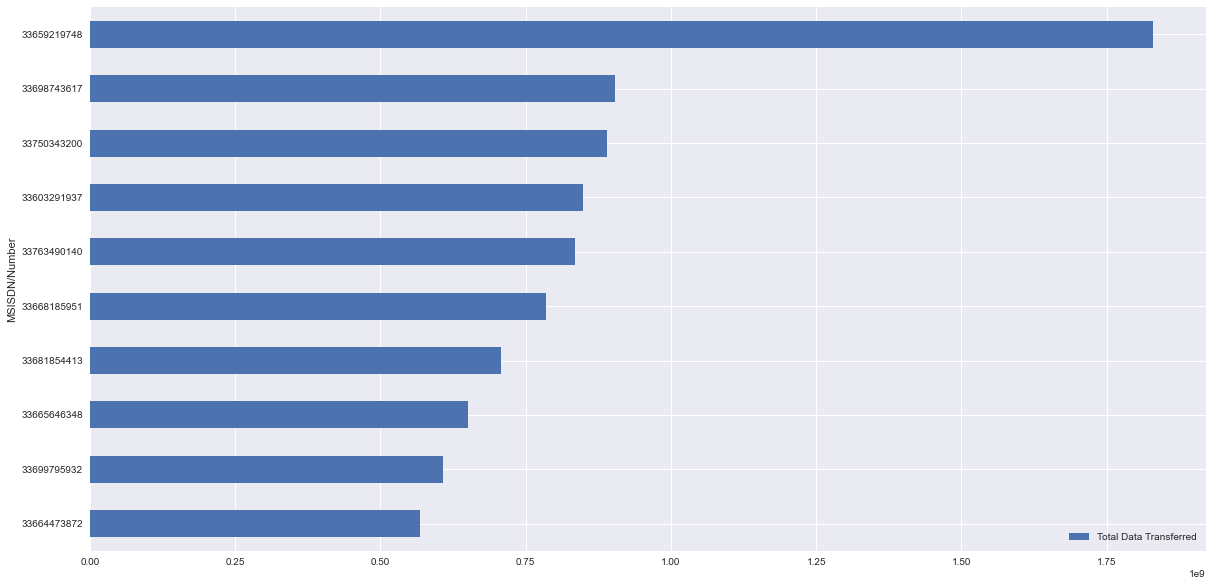

In [53]:
top_10_customers_per_data_engagement.plot(kind="barh", x="MSISDN/Number", y="Total Data Transferred", figsize=(20, 10)).invert_yaxis()

### K-means
---

In [54]:
scaler = MinMaxScaler()

In [55]:
df_norm = pd.DataFrame(scaler.fit_transform(volume_per_user.select_dtypes(include=np.number)), columns=volume_per_user.select_dtypes(include=np.number).columns)

In [56]:
df_norm.head()

,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
0,0.00,0.05,0.43,0.38,0.28,0.22,0.46,0.37,0.34,0.00
1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.42
2,0.00,0.07,0.27,0.22,0.24,0.14,0.30,0.21,0.12,0.64
3,0.00,0.63,0.14,0.00,0.20,0.12,0.16,0.42,0.31,0.18
4,0.00,0.16,0.01,0.07,0.42,0.00,0.01,0.17,0.32,1.00


In [57]:
kmeans = KMeans(n_clusters=3)
y_predicted = kmeans.fit_predict(volume_per_user.select_dtypes(include=np.number))
y_predicted

array([0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0])

In [58]:
volume_per_user["Cluster"] = kmeans.labels_

In [59]:
volume_per_user

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Cluster
0,33603291937,1,850766,848798988,13395961,22810379,26178247,769947925,3424203,1715492,45876928,0
1,33659219748,3,2454876,1829320826,30329595,66788717,86391691,1608505670,7576834,4270178,366031130,2
2,33664473872,1,889834,568809782,8822396,20124838,19623308,505668618,2348652,839351,538369717,0
3,33664962239,1,1823652,345629377,2905912,17855187,18355943,292426453,3701304,1570185,180558843,1
4,33665368271,1,1035261,118487293,4906872,31212766,9120760,58881157,2090979,1624991,814303325,1
5,33665646348,1,848637,651527183,6532777,26779600,21981135,574923841,3780918,2697600,110548061,0
6,33668185951,1,1074638,784759966,12934133,13881809,23944031,723461512,2902410,3200014,659414334,0
7,33668779552,1,780991,287850908,4850460,19664286,24448878,224103562,2953097,2330089,314117834,1
8,33669013307,1,767722,199593503,3793544,19965376,36068912,124373236,1055306,1252821,371687999,1
9,33681854413,1,1365104,707185356,4414096,35565545,39359124,609920783,937385,1933278,541959383,0


In [60]:
plt.style.use('seaborn')

<AxesSubplot:xlabel='Google Volume (Bytes)', ylabel='Total Data Transferred'>

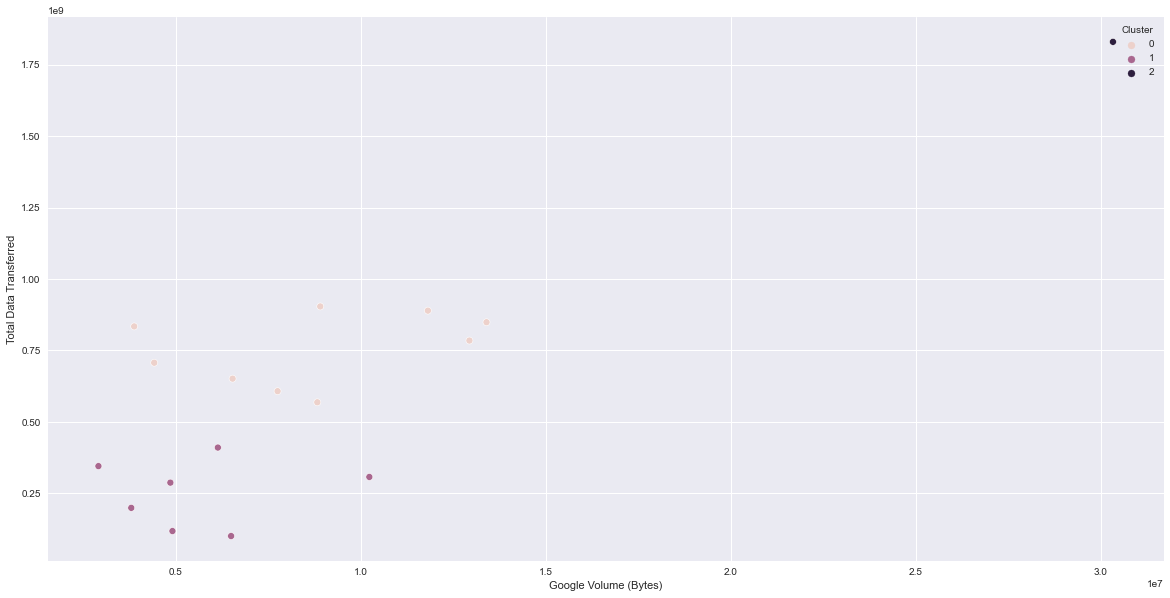

In [61]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x="Google Volume (Bytes)", y="Total Data Transferred",hue = 'Cluster',  data=volume_per_user, ax=ax)

In [63]:
volume_per_user.loc[volume_per_user["Cluster"] == 0].describe()

,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Cluster
count,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00
mean,1.00,1036935.89,755139354.67,8714975.44,21086966.78,29229482.22,679869227.56,2717230.33,1721116.00,439512383.89,0.00
std,0.00,193965.59,125278355.81,3481917.99,6662658.32,6802922.05,124828817.46,922457.29,1097768.01,256406886.04,0.00
min,1.00,848637.00,568809782.00,3872713.00,13881809.00,19623308.00,505668618.00,937385.00,372625.00,45876928.00,0.00
25%,1.00,889834.00,651527183.00,6532777.00,17539799.00,23944031.00,574923841.00,2110349.00,839351.00,187669517.00,0.00
50%,1.00,951292.00,784759966.00,8822396.00,19054441.00,29297508.00,723461512.00,2902410.00,1715492.00,541959383.00,0.00
75%,1.00,1089009.00,848798988.00,11811761.00,22810379.00,34222253.00,769947925.00,3424203.00,2697600.00,564619822.00,0.00
max,1.00,1365104.00,903975407.00,13395961.00,35565545.00,39359124.00,828219634.00,3780918.00,3200014.00,761837216.00,0.00


In [64]:
volume_per_user.loc[volume_per_user["Cluster"] == 1].describe()

,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Cluster
count,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00
mean,1.00,1046892.29,252973756.43,5616051.43,21272306.71,24351394.29,186071992.43,2730507.43,1988108.71,329274262.14,1.00
std,0.00,407093.11,116642752.07,2382988.28,8761275.50,9307811.14,112652660.69,906741.39,692967.57,249064608.03,0.00
min,1.00,767722.00,101047021.00,2905912.00,5557753.00,9120760.00,42366688.00,1055306.00,1252821.00,56842974.00,1.00
25%,1.00,779429.00,159040398.00,4322002.00,18759736.50,19918984.50,91627196.50,2372394.50,1597588.00,166529676.00,1.00
50%,1.00,780991.00,287850908.00,4906872.00,19965376.00,24448878.00,224103562.00,2953097.00,1726277.00,314117834.00,1.00
75%,1.00,1198511.50,326660175.00,6313226.50,27325389.50,30491620.50,261203352.00,3329528.00,2198525.50,393298175.00,1.00
max,1.00,1823652.00,410517220.00,10229119.00,31212766.00,36068912.00,330372600.00,3701304.00,3345436.00,814303325.00,1.00


In [65]:
volume_per_user.loc[volume_per_user["Cluster"] == 2].describe()

,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Cluster
count,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
mean,3.00,2454876.00,1829320826.00,30329595.00,66788717.00,86391691.00,1608505670.00,7576834.00,4270178.00,366031130.00,2.00
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.00,2454876.00,1829320826.00,30329595.00,66788717.00,86391691.00,1608505670.00,7576834.00,4270178.00,366031130.00,2.00
25%,3.00,2454876.00,1829320826.00,30329595.00,66788717.00,86391691.00,1608505670.00,7576834.00,4270178.00,366031130.00,2.00
50%,3.00,2454876.00,1829320826.00,30329595.00,66788717.00,86391691.00,1608505670.00,7576834.00,4270178.00,366031130.00,2.00
75%,3.00,2454876.00,1829320826.00,30329595.00,66788717.00,86391691.00,1608505670.00,7576834.00,4270178.00,366031130.00,2.00
max,3.00,2454876.00,1829320826.00,30329595.00,66788717.00,86391691.00,1608505670.00,7576834.00,4270178.00,366031130.00,2.00


In [66]:
volume_per_user.sample(5)

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Cluster
5,33665646348,1,848637,651527183,6532777,26779600,21981135,574923841,3780918,2697600,110548061,0
4,33665368271,1,1035261,118487293,4906872,31212766,9120760,58881157,2090979,1624991,814303325,1
8,33669013307,1,767722,199593503,3793544,19965376,36068912,124373236,1055306,1252821,371687999,1
13,33750343200,1,1321509,889352748,11811761,15092588,36534765,810387875,2070983,657493,761837216,0
10,33698743617,1,941634,903975407,8902099,19054441,29297508,828219634,3380069,372625,187669517,0


In [67]:
volume_per_user.sort_values(by="Google Volume (Bytes)", ascending=False)[:10]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Cluster
1,33659219748,3,2454876,1829320826,30329595,66788717,86391691,1608505670,7576834,4270178,366031130,2
0,33603291937,1,850766,848798988,13395961,22810379,26178247,769947925,3424203,1715492,45876928,0
6,33668185951,1,1074638,784759966,12934133,13881809,23944031,723461512,2902410,3200014,659414334,0
13,33750343200,1,1321509,889352748,11811761,15092588,36534765,810387875,2070983,657493,761837216,0
15,33760627129,1,1361762,307690973,10229119,23751202,34425237,229980251,3363124,1726277,414908351,1
10,33698743617,1,941634,903975407,8902099,19054441,29297508,828219634,3380069,372625,187669517,0
2,33664473872,1,889834,568809782,8822396,20124838,19623308,505668618,2348652,839351,538369717,0
12,33699795932,1,1089009,607681403,7748843,17539799,34222253,531237049,2110349,912788,564619822,0
5,33665646348,1,848637,651527183,6532777,26779600,21981135,574923841,3780918,2697600,110548061,0
14,33753758738,1,780471,101047021,6491896,5557753,26558004,42366688,2653810,2066962,152500509,1


In [68]:
volume_per_user.sort_values(by="Netflix Volume (Bytes)", ascending=False)[:10]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Cluster
1,33659219748,3,2454876,1829320826,30329595,66788717,86391691,1608505670,7576834,4270178,366031130,2
9,33681854413,1,1365104,707185356,4414096,35565545,39359124,609920783,937385,1933278,541959383,0
4,33665368271,1,1035261,118487293,4906872,31212766,9120760,58881157,2090979,1624991,814303325,1
11,33698759051,1,778387,410517220,6134557,30899577,21482026,330372600,3295932,3345436,56842974,1
5,33665646348,1,848637,651527183,6532777,26779600,21981135,574923841,3780918,2697600,110548061,0
15,33760627129,1,1361762,307690973,10229119,23751202,34425237,229980251,3363124,1726277,414908351,1
0,33603291937,1,850766,848798988,13395961,22810379,26178247,769947925,3424203,1715492,45876928,0
2,33664473872,1,889834,568809782,8822396,20124838,19623308,505668618,2348652,839351,538369717,0
8,33669013307,1,767722,199593503,3793544,19965376,36068912,124373236,1055306,1252821,371687999,1
7,33668779552,1,780991,287850908,4850460,19664286,24448878,224103562,2953097,2330089,314117834,1


In [69]:
volume_per_user.sort_values(by="Youtube Volume (Bytes)", ascending=False)[:10]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Cluster
1,33659219748,3,2454876,1829320826,30329595,66788717,86391691,1608505670,7576834,4270178,366031130,2
9,33681854413,1,1365104,707185356,4414096,35565545,39359124,609920783,937385,1933278,541959383,0
13,33750343200,1,1321509,889352748,11811761,15092588,36534765,810387875,2070983,657493,761837216,0
8,33669013307,1,767722,199593503,3793544,19965376,36068912,124373236,1055306,1252821,371687999,1
15,33760627129,1,1361762,307690973,10229119,23751202,34425237,229980251,3363124,1726277,414908351,1
12,33699795932,1,1089009,607681403,7748843,17539799,34222253,531237049,2110349,912788,564619822,0
16,33763490140,1,951292,834163359,3872713,18933702,31924969,765055811,3500104,3161403,545316477,0
10,33698743617,1,941634,903975407,8902099,19054441,29297508,828219634,3380069,372625,187669517,0
14,33753758738,1,780471,101047021,6491896,5557753,26558004,42366688,2653810,2066962,152500509,1
0,33603291937,1,850766,848798988,13395961,22810379,26178247,769947925,3424203,1715492,45876928,0


In [70]:
volume_per_user.sort_values(by="Gaming Volume (Bytes)", ascending=False)[:10]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Cluster
1,33659219748,3,2454876,1829320826,30329595,66788717,86391691,1608505670,7576834,4270178,366031130,2
10,33698743617,1,941634,903975407,8902099,19054441,29297508,828219634,3380069,372625,187669517,0
13,33750343200,1,1321509,889352748,11811761,15092588,36534765,810387875,2070983,657493,761837216,0
0,33603291937,1,850766,848798988,13395961,22810379,26178247,769947925,3424203,1715492,45876928,0
16,33763490140,1,951292,834163359,3872713,18933702,31924969,765055811,3500104,3161403,545316477,0
6,33668185951,1,1074638,784759966,12934133,13881809,23944031,723461512,2902410,3200014,659414334,0
9,33681854413,1,1365104,707185356,4414096,35565545,39359124,609920783,937385,1933278,541959383,0
5,33665646348,1,848637,651527183,6532777,26779600,21981135,574923841,3780918,2697600,110548061,0
12,33699795932,1,1089009,607681403,7748843,17539799,34222253,531237049,2110349,912788,564619822,0
2,33664473872,1,889834,568809782,8822396,20124838,19623308,505668618,2348652,839351,538369717,0


In [71]:
volume_per_user.sort_values(by="Email Volume (Bytes)", ascending=False)[:10]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Cluster
1,33659219748,3,2454876,1829320826,30329595,66788717,86391691,1608505670,7576834,4270178,366031130,2
5,33665646348,1,848637,651527183,6532777,26779600,21981135,574923841,3780918,2697600,110548061,0
3,33664962239,1,1823652,345629377,2905912,17855187,18355943,292426453,3701304,1570185,180558843,1
16,33763490140,1,951292,834163359,3872713,18933702,31924969,765055811,3500104,3161403,545316477,0
0,33603291937,1,850766,848798988,13395961,22810379,26178247,769947925,3424203,1715492,45876928,0
10,33698743617,1,941634,903975407,8902099,19054441,29297508,828219634,3380069,372625,187669517,0
15,33760627129,1,1361762,307690973,10229119,23751202,34425237,229980251,3363124,1726277,414908351,1
11,33698759051,1,778387,410517220,6134557,30899577,21482026,330372600,3295932,3345436,56842974,1
7,33668779552,1,780991,287850908,4850460,19664286,24448878,224103562,2953097,2330089,314117834,1
6,33668185951,1,1074638,784759966,12934133,13881809,23944031,723461512,2902410,3200014,659414334,0


In [72]:
volume_per_user.sort_values(by="Social Media Volume (Bytes)", ascending=False)[:10]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Cluster
1,33659219748,3,2454876,1829320826,30329595,66788717,86391691,1608505670,7576834,4270178,366031130,2
11,33698759051,1,778387,410517220,6134557,30899577,21482026,330372600,3295932,3345436,56842974,1
6,33668185951,1,1074638,784759966,12934133,13881809,23944031,723461512,2902410,3200014,659414334,0
16,33763490140,1,951292,834163359,3872713,18933702,31924969,765055811,3500104,3161403,545316477,0
5,33665646348,1,848637,651527183,6532777,26779600,21981135,574923841,3780918,2697600,110548061,0
7,33668779552,1,780991,287850908,4850460,19664286,24448878,224103562,2953097,2330089,314117834,1
14,33753758738,1,780471,101047021,6491896,5557753,26558004,42366688,2653810,2066962,152500509,1
9,33681854413,1,1365104,707185356,4414096,35565545,39359124,609920783,937385,1933278,541959383,0
15,33760627129,1,1361762,307690973,10229119,23751202,34425237,229980251,3363124,1726277,414908351,1
0,33603291937,1,850766,848798988,13395961,22810379,26178247,769947925,3424203,1715492,45876928,0


In [73]:
volume_per_user.sort_values(by="Other Volume (Bytes)", ascending=False)[:10]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Cluster
4,33665368271,1,1035261,118487293,4906872,31212766,9120760,58881157,2090979,1624991,814303325,1
13,33750343200,1,1321509,889352748,11811761,15092588,36534765,810387875,2070983,657493,761837216,0
6,33668185951,1,1074638,784759966,12934133,13881809,23944031,723461512,2902410,3200014,659414334,0
12,33699795932,1,1089009,607681403,7748843,17539799,34222253,531237049,2110349,912788,564619822,0
16,33763490140,1,951292,834163359,3872713,18933702,31924969,765055811,3500104,3161403,545316477,0
9,33681854413,1,1365104,707185356,4414096,35565545,39359124,609920783,937385,1933278,541959383,0
2,33664473872,1,889834,568809782,8822396,20124838,19623308,505668618,2348652,839351,538369717,0
15,33760627129,1,1361762,307690973,10229119,23751202,34425237,229980251,3363124,1726277,414908351,1
8,33669013307,1,767722,199593503,3793544,19965376,36068912,124373236,1055306,1252821,371687999,1
1,33659219748,3,2454876,1829320826,30329595,66788717,86391691,1608505670,7576834,4270178,366031130,2


In [74]:
top_3_applications = volume_per_user[["Google Volume (Bytes)", "Netflix Volume (Bytes)", "Email Volume (Bytes)", "Youtube Volume (Bytes)", "Gaming Volume (Bytes)", "Social Media Volume (Bytes)", "Other Volume (Bytes)"]].sum().nlargest(3)

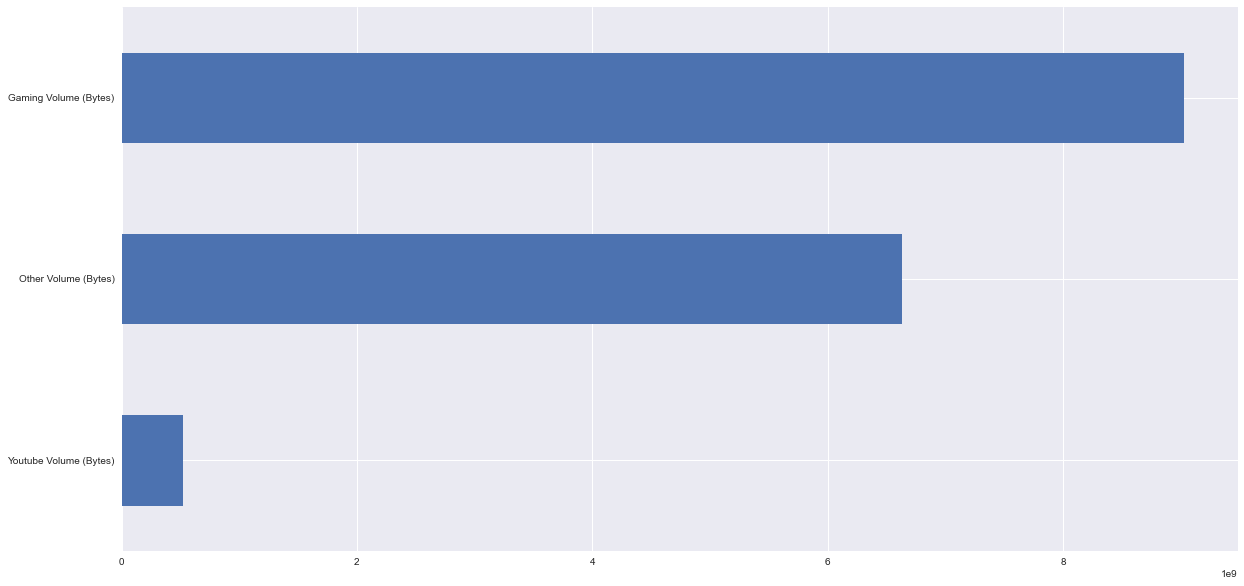

In [75]:
top_3_applications.plot(kind="barh", figsize=(20, 10)).invert_yaxis()